## GR5241 Homework 2
### Name: Kangshuo Li           UNI: kl3259

### 5.
![](GR5241_HW2_P5.png)

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import time
import os
os.getcwd()

'/Users/kangshuoli/Documents/VScode_workspace/GR5241/GR5241_HW2'

In [2]:
# read in data
raw_df = pd.read_table(
    'hw2_Q5.txt', 
    header = None, 
    sep = ','
)
raw_df.shape
raw_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
raw_df['class'] = raw_df['class'].astype(int)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### (a)


1. Class of Setosa:
   ![](Iris_setosa.jpeg)
2. Class of Versicolor:
   ![](Iris_versicolor.jpeg)
3. Class of Virginica:
   ![](Iris_virginica.jpeg)

#### (b)

In [3]:
corr_df = raw_df.corr()
corr_result = corr_df.iloc[np.arange(4), -1]
corr_result

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
Name: class, dtype: float64

According to the correlation among $X$ s and $Y$, we can find that sepal_width have the minimum absolute correlation value between class $Y$, which means that it cannot explains most of the variation of $Y$, so sepal_length would be discarded first. 

#### (c)

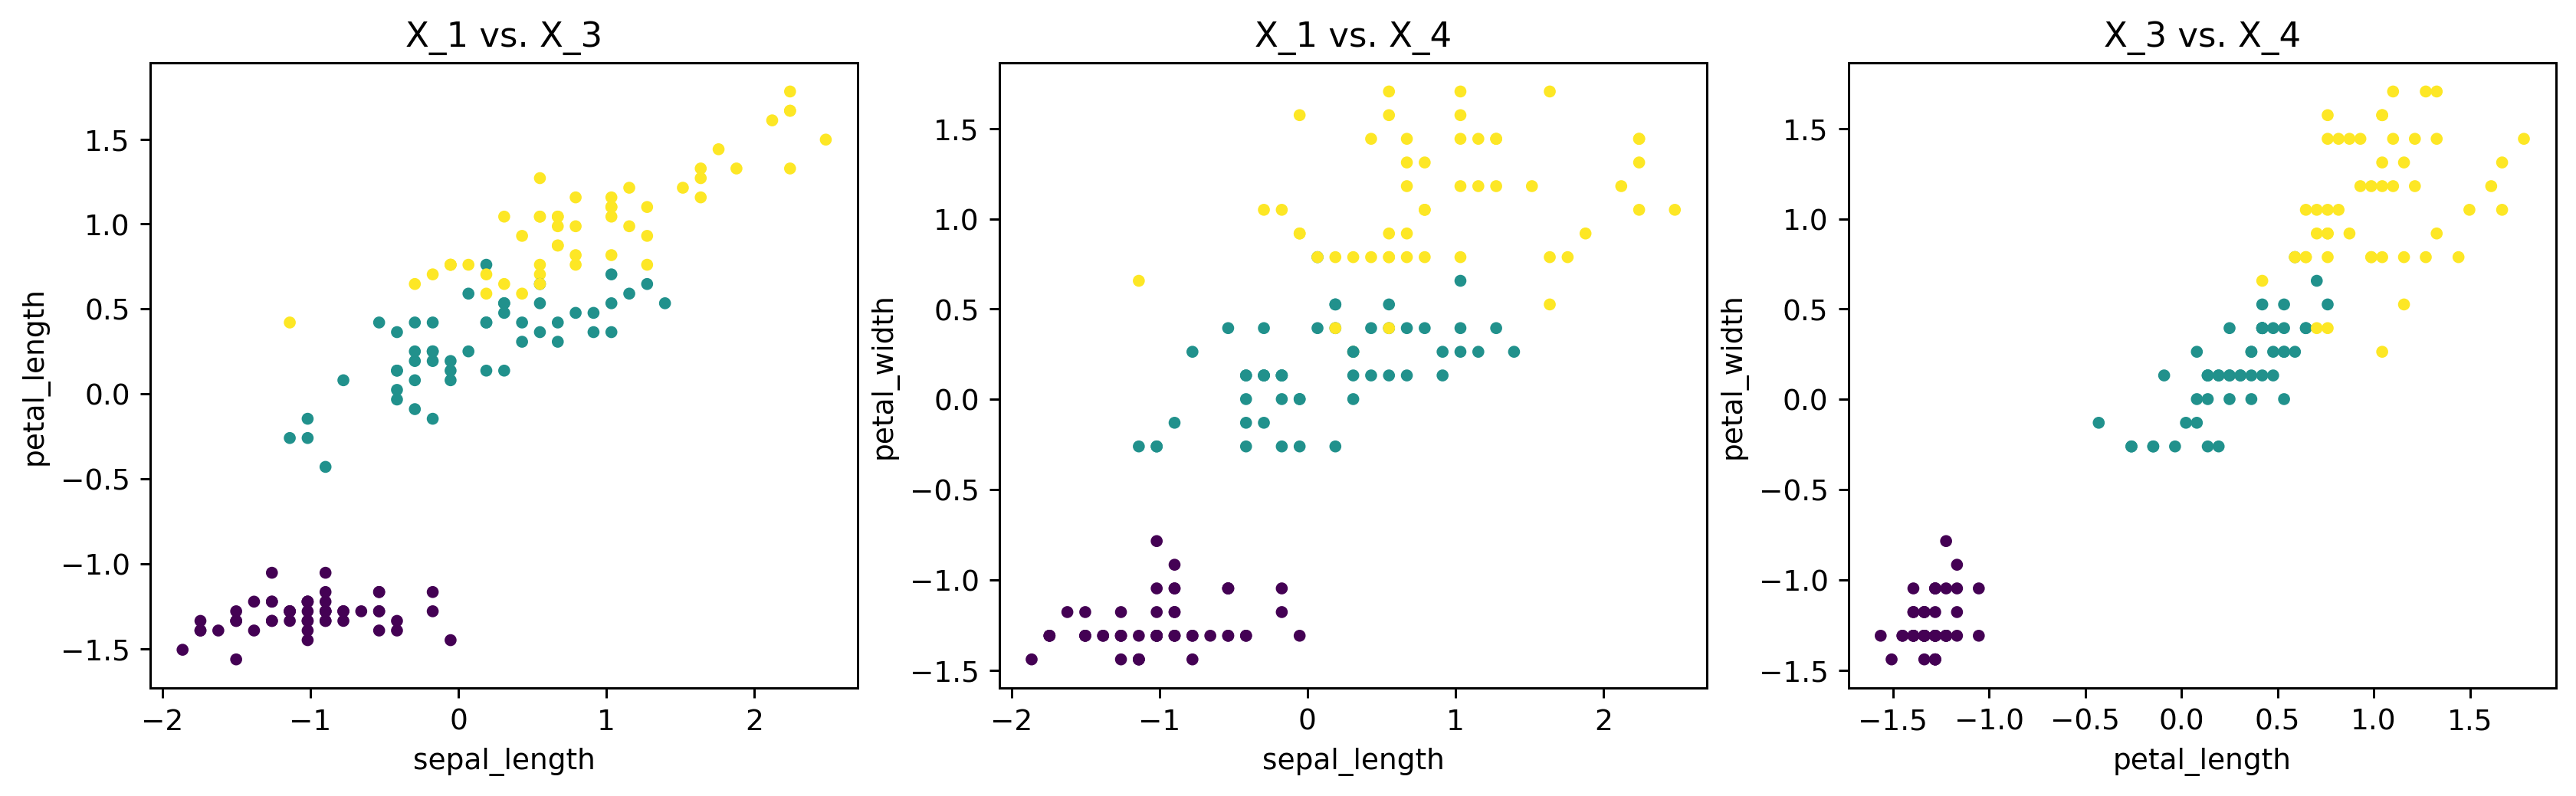

In [4]:
X_df = raw_df.loc[:,["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X_df_normalized = (X_df - X_df.mean()) / X_df.std()
X_df_normalized
data_df_normalized = pd.concat([X_df_normalized, raw_df["class"]], axis = 1)

fig, ax = plt.subplots(1, 3, figsize = (15,4), dpi = 270)
ax[0].scatter(
    data_df_normalized["sepal_length"], 
    data_df_normalized["petal_length"], 
    s = 10, 
    c = data_df_normalized["class"]
)
ax[0].set_title("X_1 vs. X_3")
ax[0].set_xlabel("sepal_length")
ax[0].set_ylabel("petal_length")

ax[1].scatter(
    data_df_normalized["sepal_length"], 
    data_df_normalized["petal_width"],
    s = 10, 
    c = data_df_normalized["class"]
)
ax[1].set_title("X_1 vs. X_4")
ax[1].set_xlabel("sepal_length")
ax[1].set_ylabel("petal_width")

ax[2].scatter(
    data_df_normalized["petal_length"], 
    data_df_normalized["petal_width"],
    s = 10, 
    c = data_df_normalized["class"]
)
ax[2].set_title("X_3 vs. X_4")
ax[2].set_xlabel("petal_length")
ax[2].set_ylabel("petal_width")

plt.show()

According to the plot, the 3 different classes are not linearly separable when we use only these pairs of $X$ s as their features for classification. 

#### (d)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
%xmode plain

# instantiate the classifiers
# classifiers: dectree_1 / dectree_2 / dectree_3 / 
#              knn_1 / knn_2 / knn_3 / svm_1 / svm_2 / 
#              sum_3 / nb_1 / nb_2 / nb_3 / ada_1 / ada_2 / ada_3
# each index corresponds to a pair: 1 - ("sepal_length", "petal_length")
#                                   2 - ("sepal_length", "petal_width")
#                                   3 - ("petal_length", "petal_width")
for i in np.arange(3):
    globals()['dectree_' + str(i + 1)] = DecisionTreeClassifier()
    globals()['knn_' + str(i + 1)] = KNeighborsClassifier(
        n_neighbors = 3
    )
    globals()['svm_' + str(i + 1)] = SVC(
        C = 1,
        gamma = 2
    )
    # assume that the length and width of sepal and petal follow Gaussian distribution
    globals()['nb_' + str(i + 1)] = GaussianNB()
    globals()['ada_' + str(i + 1)] = AdaBoostClassifier(
        n_estimators = 30, 
        base_estimator = DecisionTreeClassifier(
            max_depth = 3
        ), 
        random_state = 42
    )

# training
x_pairs_list = [
    ["sepal_length", "petal_length"], 
    ["sepal_length", "petal_width"], 
    ["petal_length", "petal_width"]
]
clf_list = ["dectree", "knn", "svm", "nb", "ada"]
score_dict = {}
for i in np.arange(len(x_pairs_list)):
    # get the x pair
    curr_pair = x_pairs_list[i]
    curr_X = data_df_normalized[curr_pair]
    y = data_df_normalized["class"]
    for clf in clf_list:
        globals()[clf + '_' + str(i + 1)].fit(curr_X, y)
        score_dict[clf + '_' + str(i + 1)] = globals()[clf + '_' + str(i + 1)].score(curr_X, y)

# report the score
temp_score_df = pd.DataFrame.from_dict(score_dict, orient = 'index', columns = ["score"])
score_df = pd.DataFrame(
    data = np.zeros((5,3)),
    columns = ["(X1,X3)", "(X1,X4)", "(X3,X4)"], 
    index = ["dectree", "knn", "svm", "nb", "ada"], 
    dtype = float
)
score_df["(X1,X3)"] = temp_score_df.iloc[0:5,0].values
score_df["(X1,X4)"] = temp_score_df.iloc[5:10,0].values
score_df["(X3,X4)"] = temp_score_df.iloc[10:15,0].values
score_df

Exception reporting mode: Plain


,"(X1,X3)","(X1,X4)","(X3,X4)"
dectree,0.993333,0.973333,0.993333
knn,0.960000,0.966667,0.986667
svm,0.966667,0.966667,0.960000
nb,0.913333,0.960000,0.960000
ada,0.993333,0.973333,0.993333


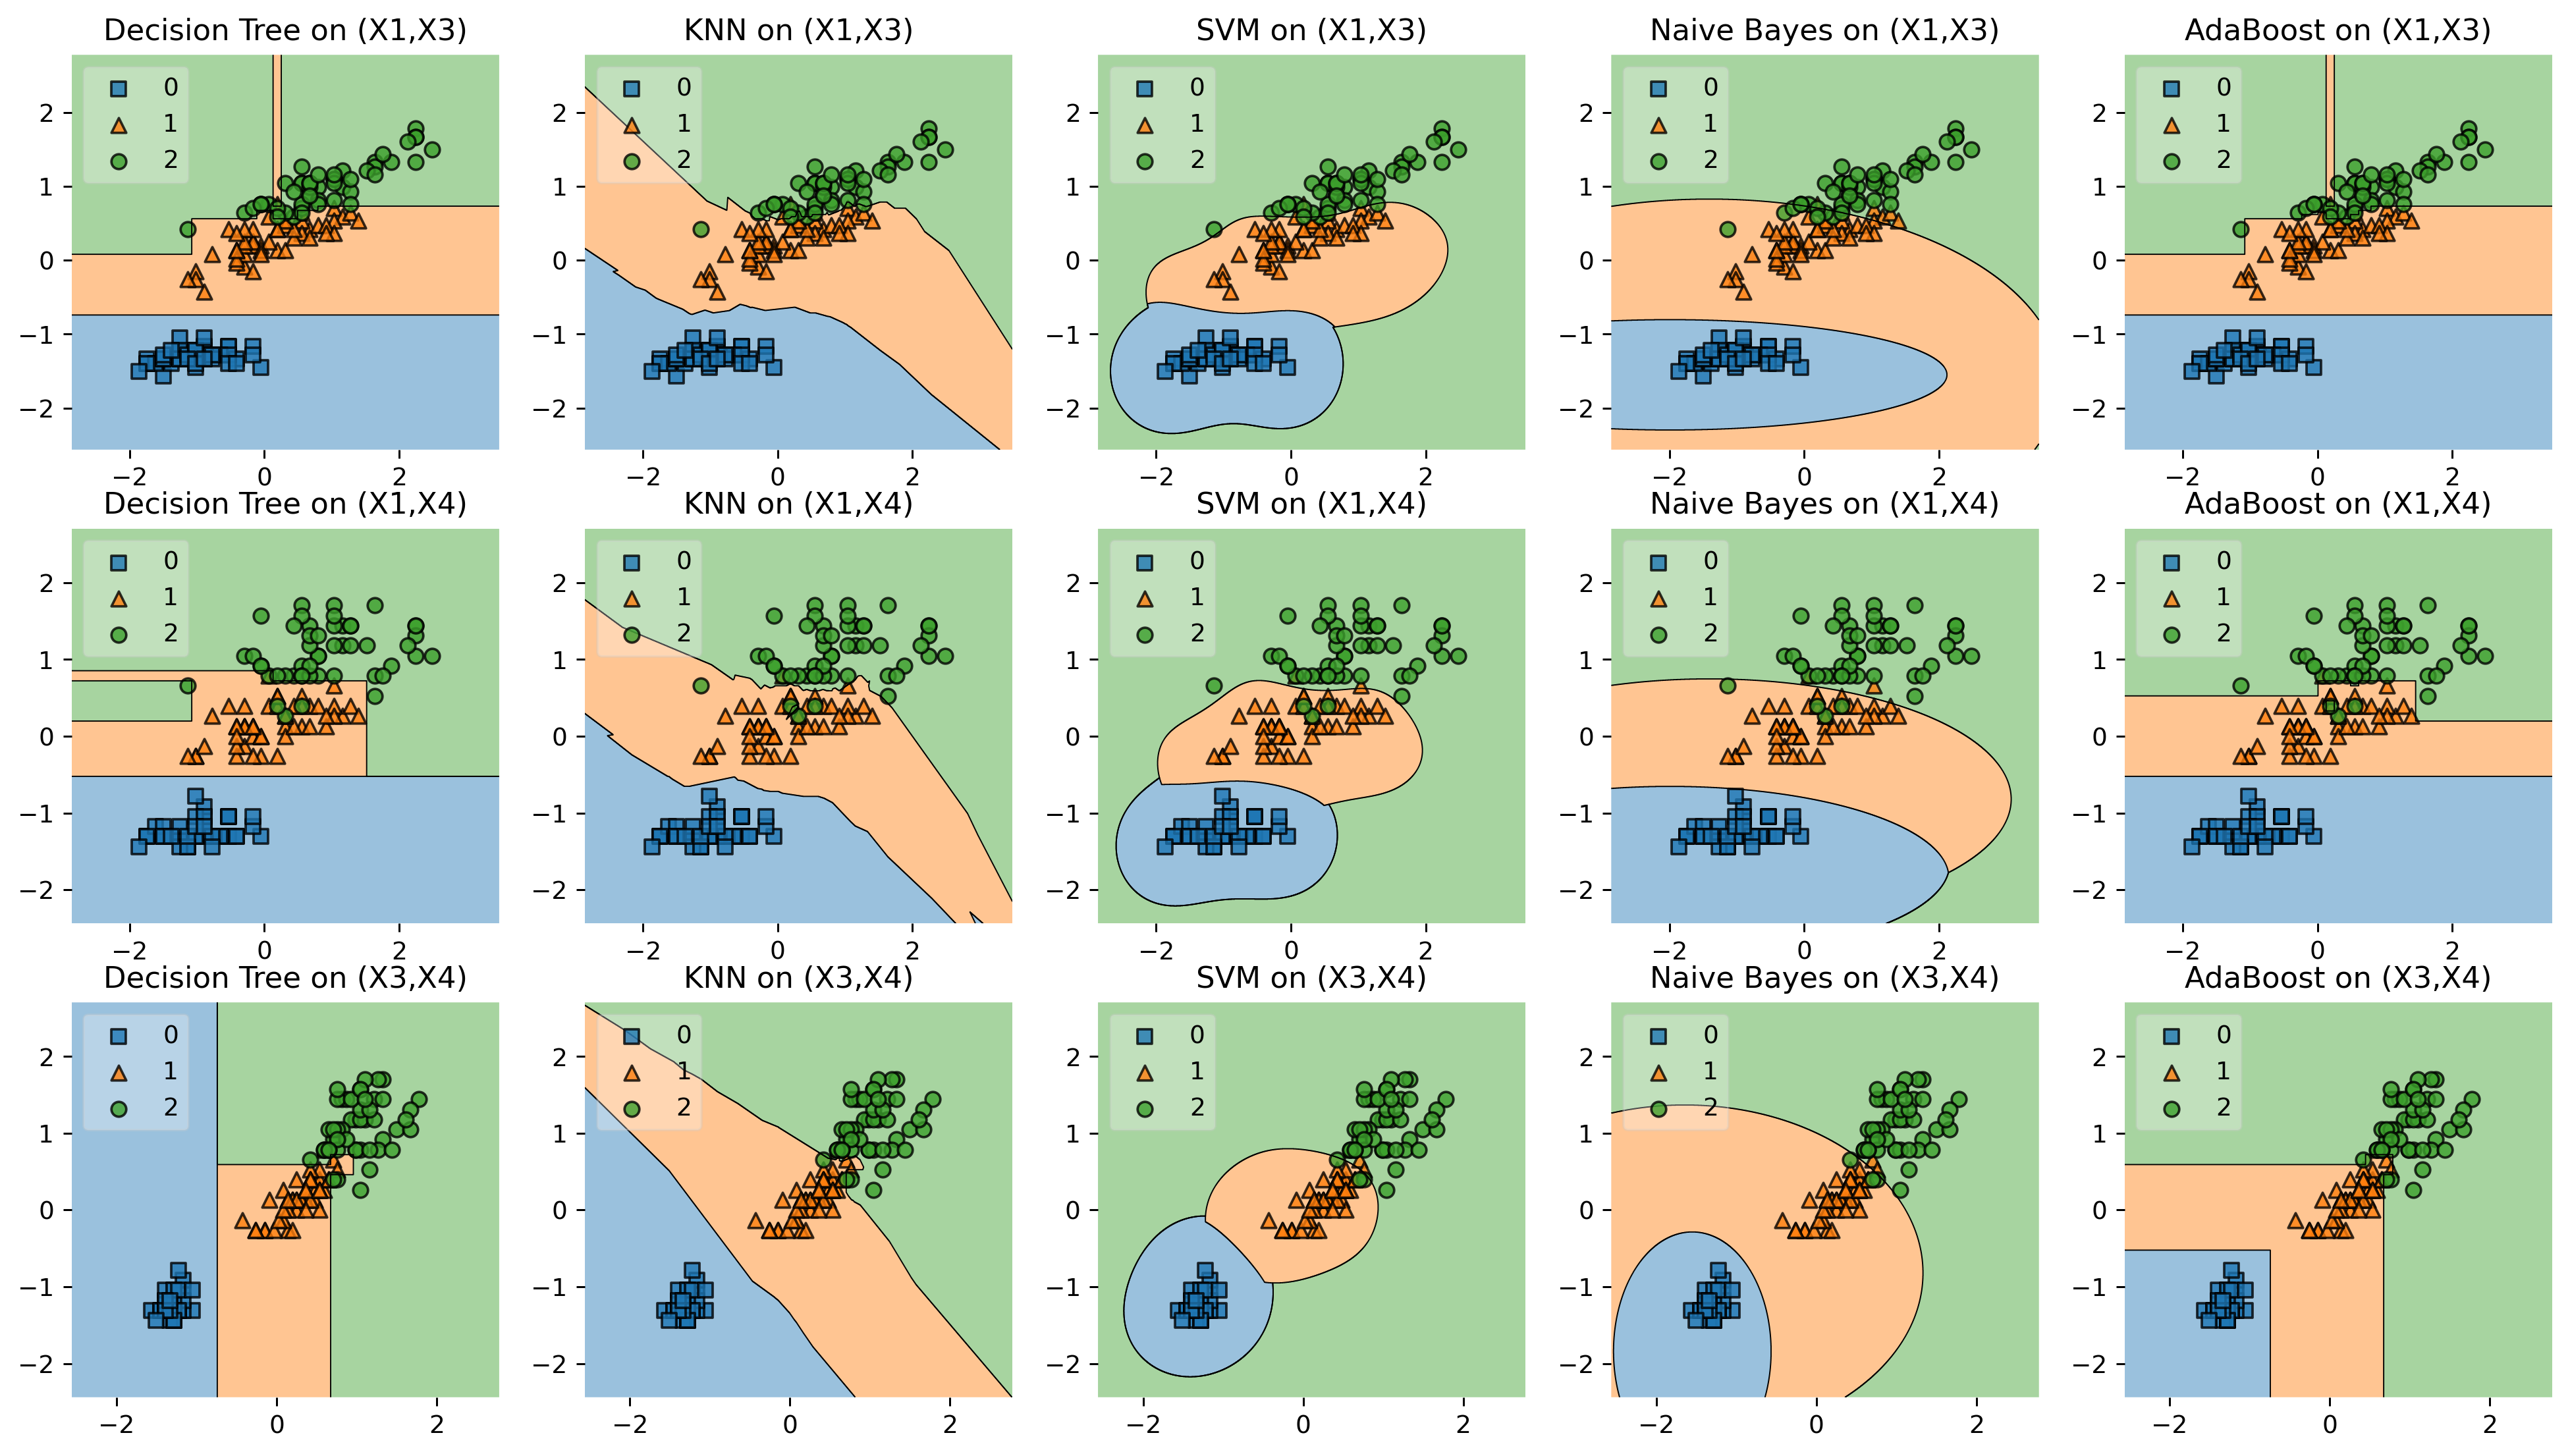

In [9]:
# visualize the decision surface
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(3, 5, figsize = (18,10), dpi = 270)
title_list = [
    'Decision Tree',
    'KNN',
    'SVM',
    'Naive Bayes', 
    'AdaBoost'
]

for cnt in np.arange(15):
    if int(cnt / 5) == 0:
        curr_X = data_df_normalized[x_pairs_list[0]]
        curr_title = title_list[cnt % 5] + " on (X1,X3)"
        curr_clf = clf_list[cnt % 5] + "_1"
        curr_ax = ax[0, cnt % 5]
    elif int(cnt / 5) == 1:
        curr_X = data_df_normalized[x_pairs_list[1]]
        curr_title = title_list[cnt % 5] + " on (X1,X4)"
        curr_clf = clf_list[cnt % 5] + "_2"
        curr_ax = ax[1, cnt % 5]
    else: 
        curr_X = data_df_normalized[x_pairs_list[2]]
        curr_title = title_list[cnt % 5] + " on (X3,X4)"
        curr_clf = clf_list[cnt % 5] + "_3"
        curr_ax = ax[2, cnt % 5]

    plot_decision_regions(
        X = curr_X.values, 
        y = y.values,
        clf = globals()[curr_clf], 
        legend = 2, 
        ax = curr_ax
    )
    curr_ax.set_title(curr_title)

plt.show()

According to the plot, all of these classifiers are classifiers with nonlinear decision boundaries. Note that all the classifiers allow some misclassification, and all of them find the pattern of the $X$ pairs successfully, and their scores all exceed 0.9. In all of these classifiers, only KNN needs to store all the data, which is storage expensive since it is the only instance-based classifier. The other classifiers only need to save the decision rules. For pairs $(X_1, X_3)$ , Naive Bayes classifier shows a relatively poor performance comparing with other methods. 

Decision tree classifier and the AdaBoost classifier outperform the others. Decision tree classifier without any limitation tends to be overfitting but with great interpretability and good performance for small dimensions data, AdaBoost is an ensemble implementation of a large number of simple Decision Trees, which can easily increase variance and reduce bias, meanwhile, it also has the advantage of good interpretability. Naive Bayes has fewer parameters to fit, which is computationally efficient, while the assumption might be violated and we have to use MAP. SVM classifier has to use kernel function to map the feature to higher dimensions to make them linearly separable, which might increase the computational burden and introduce more parameters, however, the kernel trick and dual formation can solve this problem. 